In [23]:
%run common-imports.ipynb

# POLYNOMIAL REGRESSION WITH DATASET-2


## Prerequisites

Before you study this notebook, you must have gone through and understood the detailed notes in the `Linear regression` notebook. 

## Lab Goals

* We will explore this data, observe its statistical characteristics, visualize it.
* Next, we will take a systematic approach to build  linear and polynomial regression models to make prediction on the data. 

## Outcome

At the end of the lab, we should have an understanding of the following:

1. Importance of the residual plots.
2. Heteroscedasticity, and what it indicates.
3. Polynomail regression.

## Load and explore the data

A dataframe is the fundamental representation of data, and provides means to fluently manipulate and transform the data, as well as perform exploratory data analysis with it. Conveniently, most of the machine learning libraries take a dataframe as argument.

In [24]:
#source = 'https://raw.githubusercontent.com/'
data = pd.read_csv("../datasets/dataset-2.csv")

Now, let's get some rows of the data to get a feel for it. We have a few choices here:

* `head()` will give us the first few rows of data, `head(n)` will give us specifically the first `n` rows of data
* `tail()` will give us the last few rows of data, `tail(n)` will give us specifically the last `n` rows of data

In [25]:
data.head()

,x,y
0,5.065015,-1.351232
1,5.053581,-1.498223
2,5.813660,-0.543728
3,5.313629,-1.099390
4,0.280302,0.510171


In [26]:
data.tail()

,x,y
94,0.843157,0.901317
95,5.151699,-1.412730
96,2.518961,0.922381
97,4.294334,-1.474089
98,1.200025,0.991578


In [27]:
data.sample(5)

,x,y
62,4.363416,-1.254889
40,0.592415,0.769757
95,5.151699,-1.412730
18,4.076918,-1.026131
97,4.294334,-1.474089


#### Descriptive statistics
Pandas dataframe gives a convenient method to quickly observe the key descriptive statistics.

In [28]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
x,99.0,3.148976,1.880196,0.038072,1.457762,3.081753,4.777492,6.246581
y,99.0,-0.028816,1.002099,-1.529792,-1.058620,0.014350,0.901731,1.561481


#### Missing Values Analysis

Often times, dataset will have missing values -- certain instances of data will have one of more features missing their values. This can happen for a variety of reasons. For example, a value there may not make sense. For example, if you have a dataset on mammalian animals, one of the feature may be the length of the legs. A dolphin is a mammal, but it does not have legs (in the traditional sense). Therefore, a datum representing the attributes of a particular dophin will have a missing values for the attributes specifying the length of its legs. Another common reason could be that that specific feature, while it could have been observed, happened to not have been. An example can be the number of fireplaces in a house, when looking at a housing dataset.

Let us now check if there are any missing values in the data:

In [29]:
data.isnull().sum()

x    0
y    0
dtype: int64

There is also an excellent library `missingno` that presents the information visually:

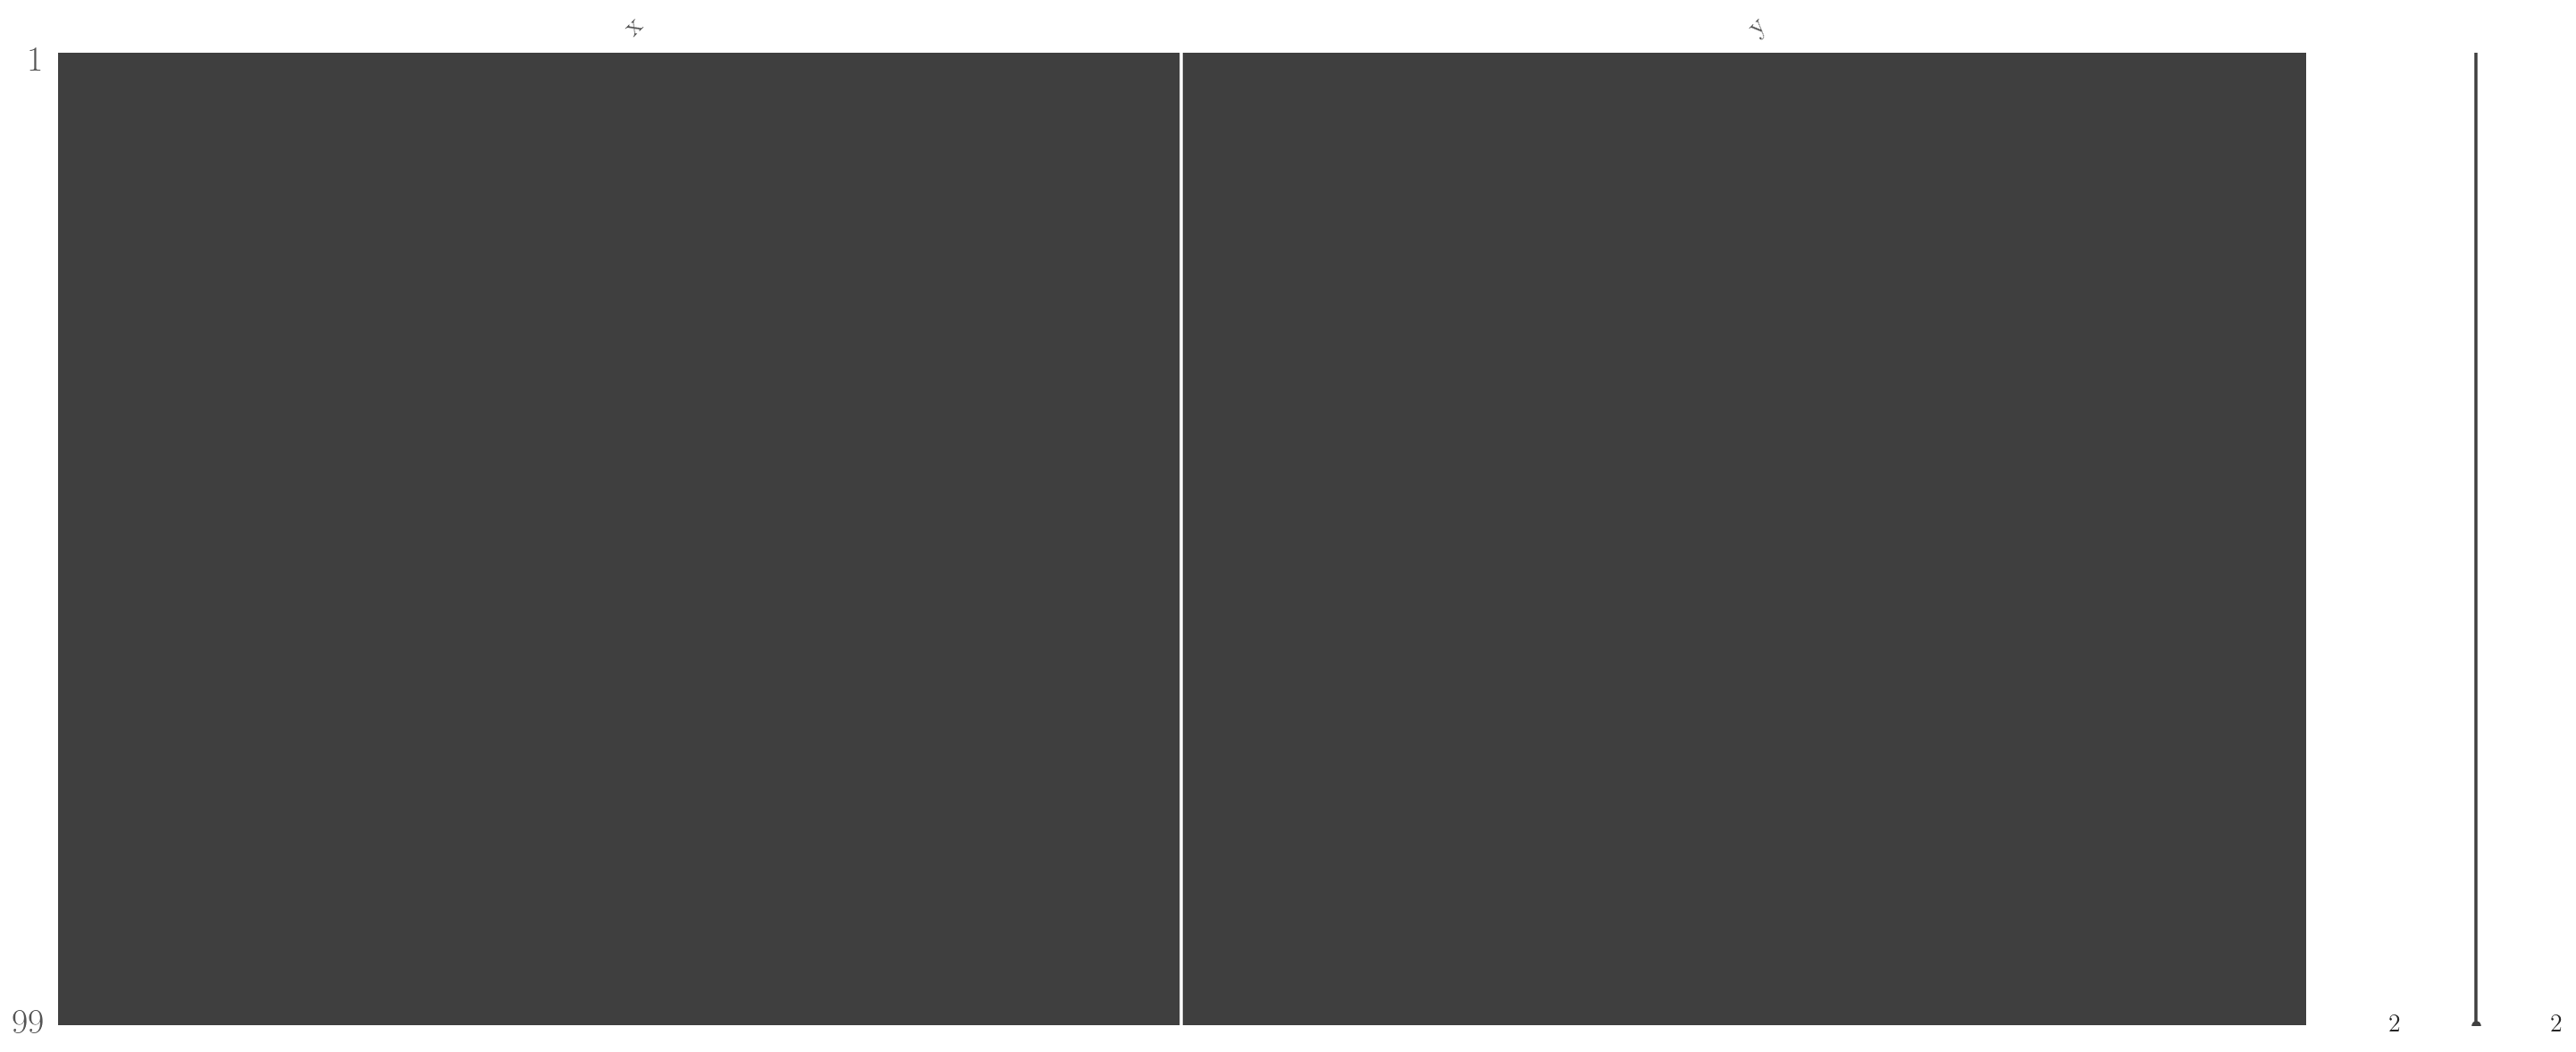

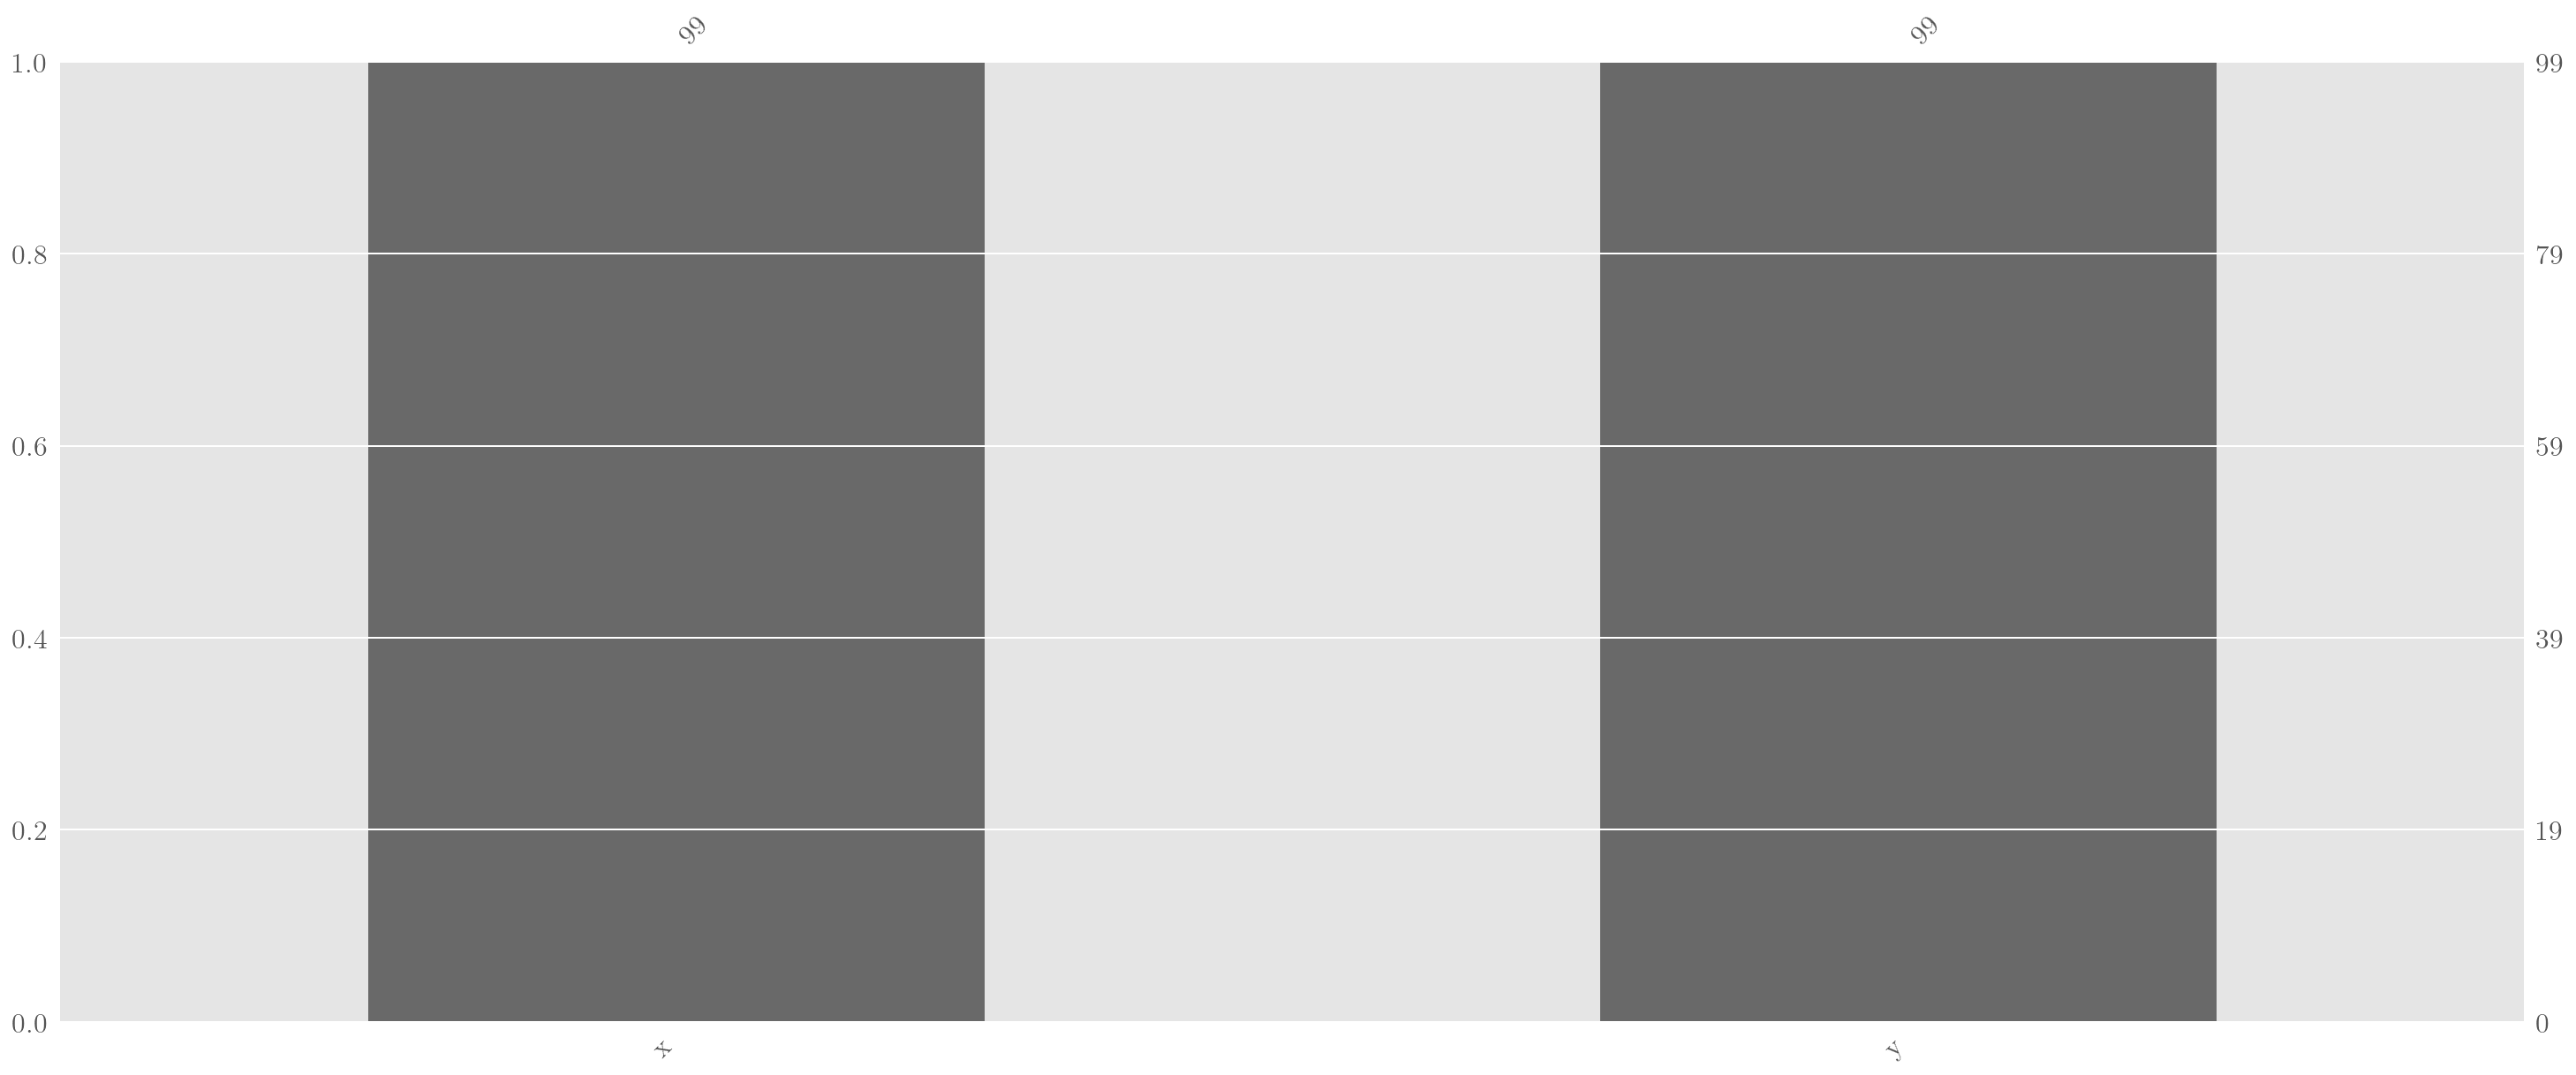

In [30]:
import missingno as msno
msno.matrix(data);
plt.show()
msno.bar(data);
plt.show()

 From the above results, it appears that there are no missing values at all. Therefore, we don't need to worry about addressing this issue.

#### Pandas Profiling

This is a useful tool to get a quick sense of the dataset. If you have not installed it yet, comment the below cell, and run it:

In [31]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Visualization

Let us now visualize this data to get a better sense of what it looks like. There is a rich variety of good data visualization libraries available in Python. Here we will use the mostly commonly used library, that is often considered the default one. This is the `matplotlib` library.

Consider investing some time in becoming fluent in `matplotlib` it is one of the most common and necessary tools to master.

start with a simple scatterplot of the bivariate data:

### Plotting using matplotlib

Observe that the data distinctly exhibits nonlinearity of relationship between $x$ and $y$. **Can you guess what the correlation is between the variables?** Try finding the answer programmatically, and see if it agrees with your guess. What does it say about the relationship between $x$ and $y$?


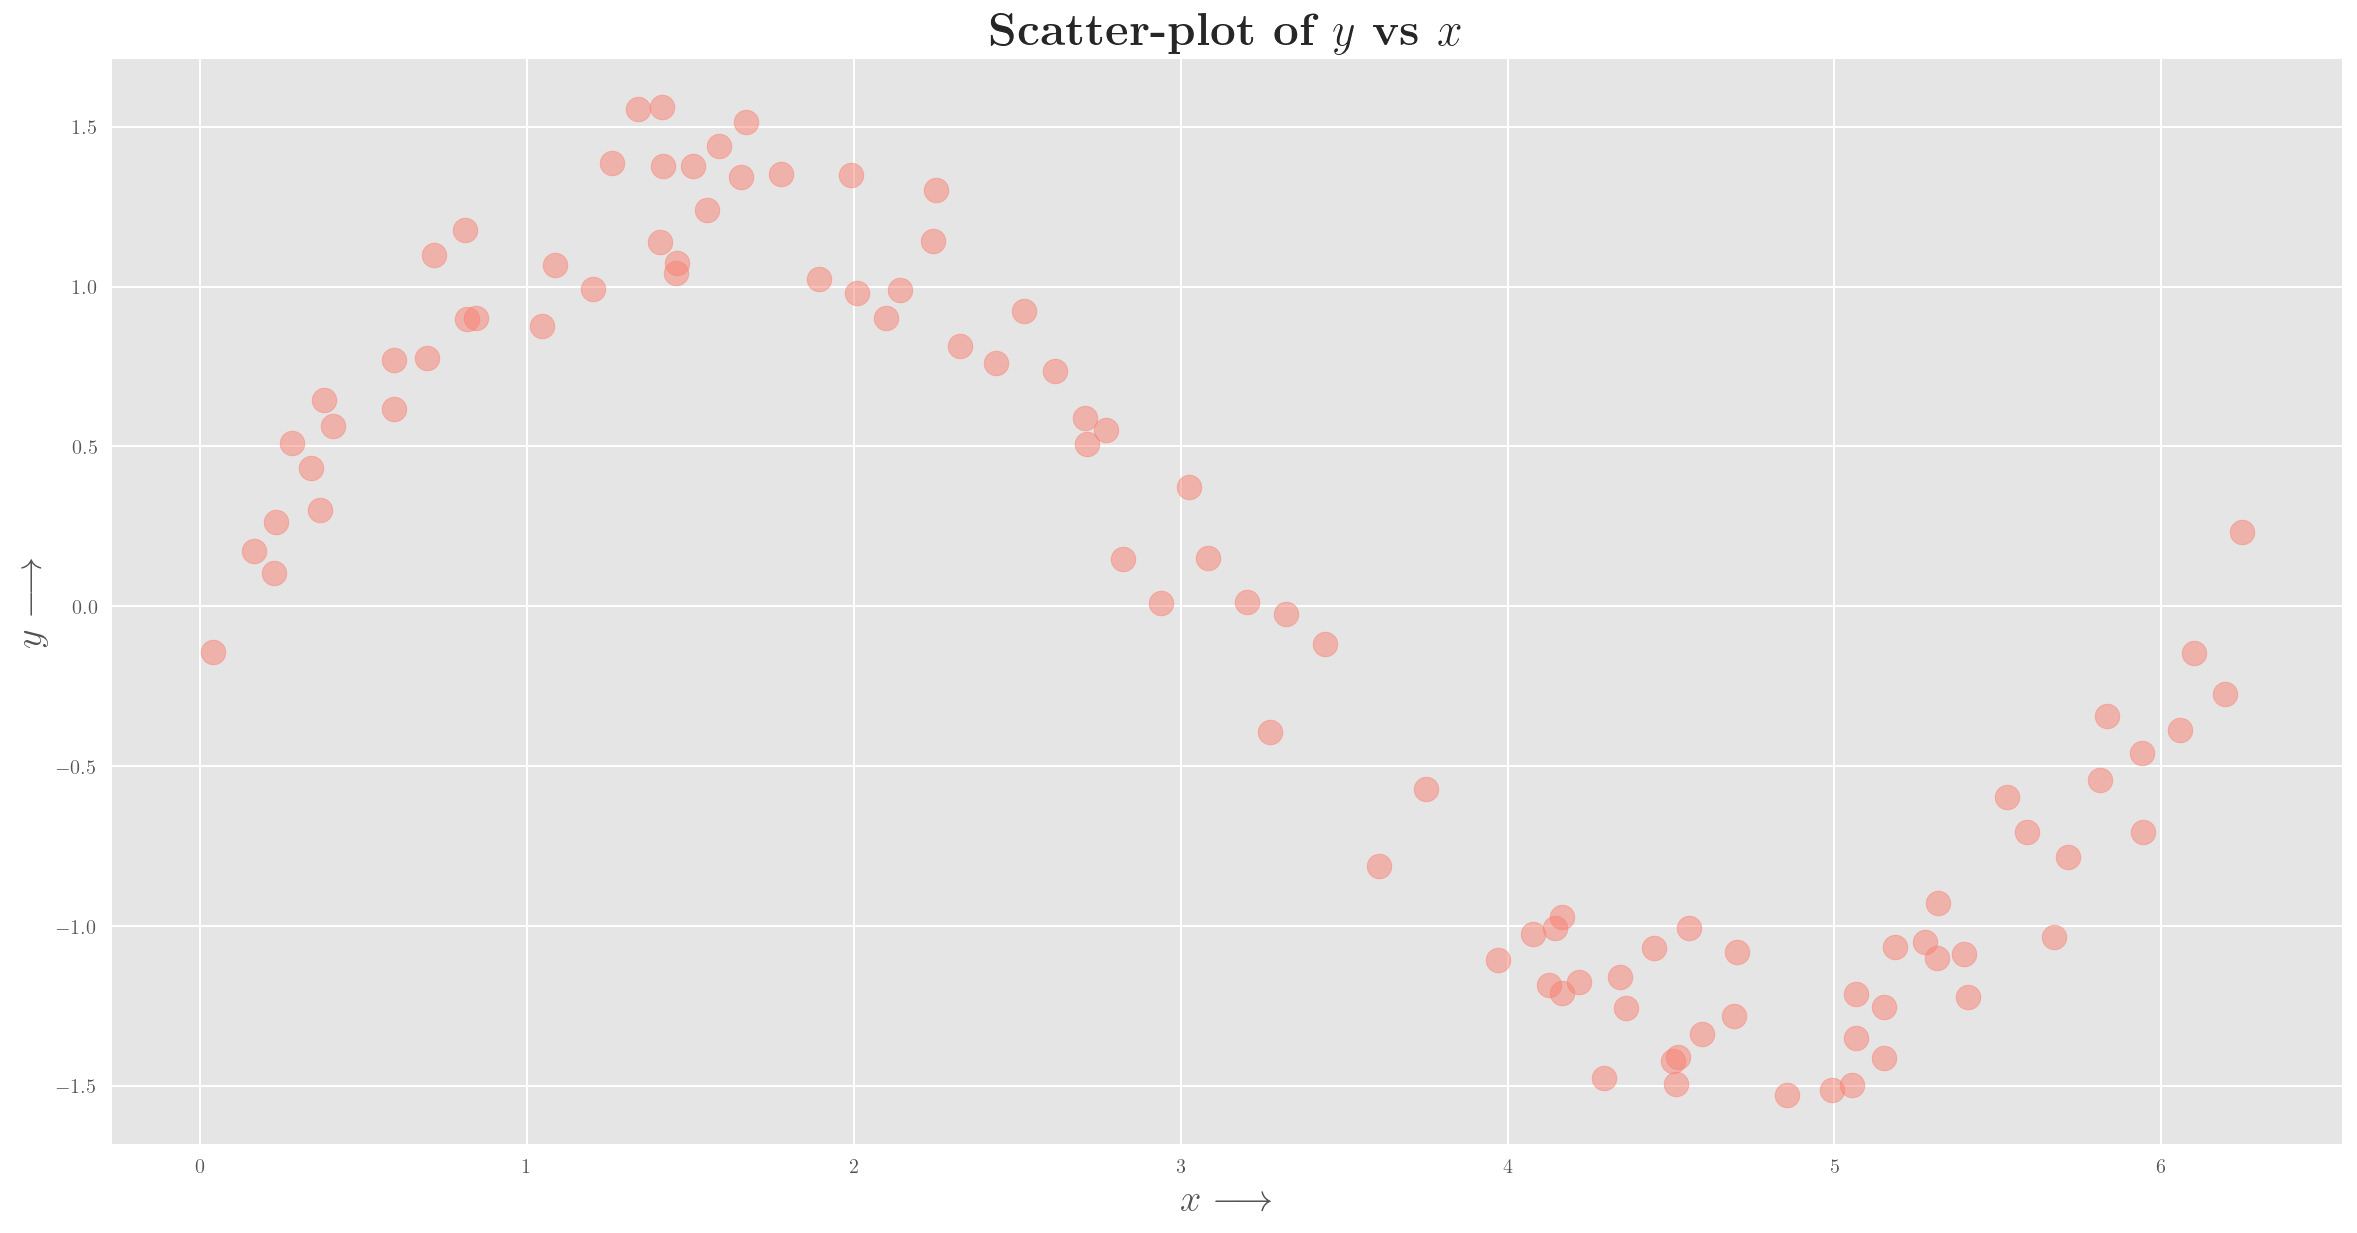

In [32]:
plt.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
plt.title(r'\textbf{Scatter-plot of $y$ vs $x$}')
plt.xlabel(r'$x\longrightarrow$');
plt.ylabel(r'$y\longrightarrow$');

# Regression

Let us build a linear regression model for this dataset. In order to do so, we will start out with Scikit-Learn library (`sklearn`). In our dataset, let us treat `x` as the independent variable, also called a predictor or regressor, or simply, input variable. And let `y` be the dependent variable, also called the target variable, the output, the response (and very rarely, the regressand).

We will first separate out the predictor from the target:

In [33]:
X, y = data[['x']], data['y']

Observe that we have called the predictor dataframe as `X` (note the capitalization), and the target as simply the array of values: `y`. While we could have named the variables anything, it is a well established practice in python based data science notebooks to follow this particular naming convention. It makes is much easier for other data scientists to read a notebook if it follows the well established naming conventions.

## Split the data into test and train subsets

In order to know how good at predicting are the regression models we will build, we need to take a subset of the data, and sort of "hide it under the pillow", and not allow the algorithm to see it during the training process. Then we can check if the model is making good predictions by comparing the said predictions against the actual target values.

Once again, observe how we follow the well established naming conventions for the training and test subsets of the data:


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size=0.5)

## Build a linear regression model

Let us now build a regression model, and fit it to the dataset. For this, we instantiate a `LinearRegression` object named `model` using the constructor. Then we fit the `model` to the available training dataset.

In [35]:
model = LinearRegression();
model.fit(X_train, y_train);

Recall that a linear regression model is given by the equation:

\begin{equation} y =  \beta_0 + \beta_1 x + \epsilon\end{equation}

where:
$\epsilon$ is the irreducible error term, so that the model is essentially:

\begin{equation} \hat{y} =  \beta_0 + \beta_1 x \end{equation}

What values of $\beta_0$ (the intercept) and $\beta_1$ (the slope) is this model predicting? We can inspect this as follows:

In [36]:
print (f'Intercept: {model.intercept_}, Slope: {model.coef_}')

Intercept: 1.4832087674052177, Slope: [-0.45426453]


Look back at the data visualization, and see if this agrees with your own estimates.

## Predictions from the model

Now, let us use the model to make predictions on the **test** data, something the model has not seen so far. By comparing the predictions to the actual values, we will get a sense of how well the model has learned to generalize from the data. 


In [37]:
yhat = model.predict(X_test)
print("Mean Squared Error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

Mean Squared Error: 0.45
Coefficient of Determination (R^2):0.5327472233099471


The coefficient of determination, $R^2$ is not too high, but it may be acceptable. To find out if we have a good model, we will proceed with the next step of model verification: namely the residual analysis.

## Residual Analysis

start by plotting the residuals from the predictions. Recall that the residual from the prediction $\hat{y}_i$ on a particular datum $(x_i, y_i)$ is defined as: 

\begin{equation}\mathbf{ r_i = \hat{y}_i  - y_i }\end{equation}

We will use the `yellowbrick` library for looking at the model characteristics.

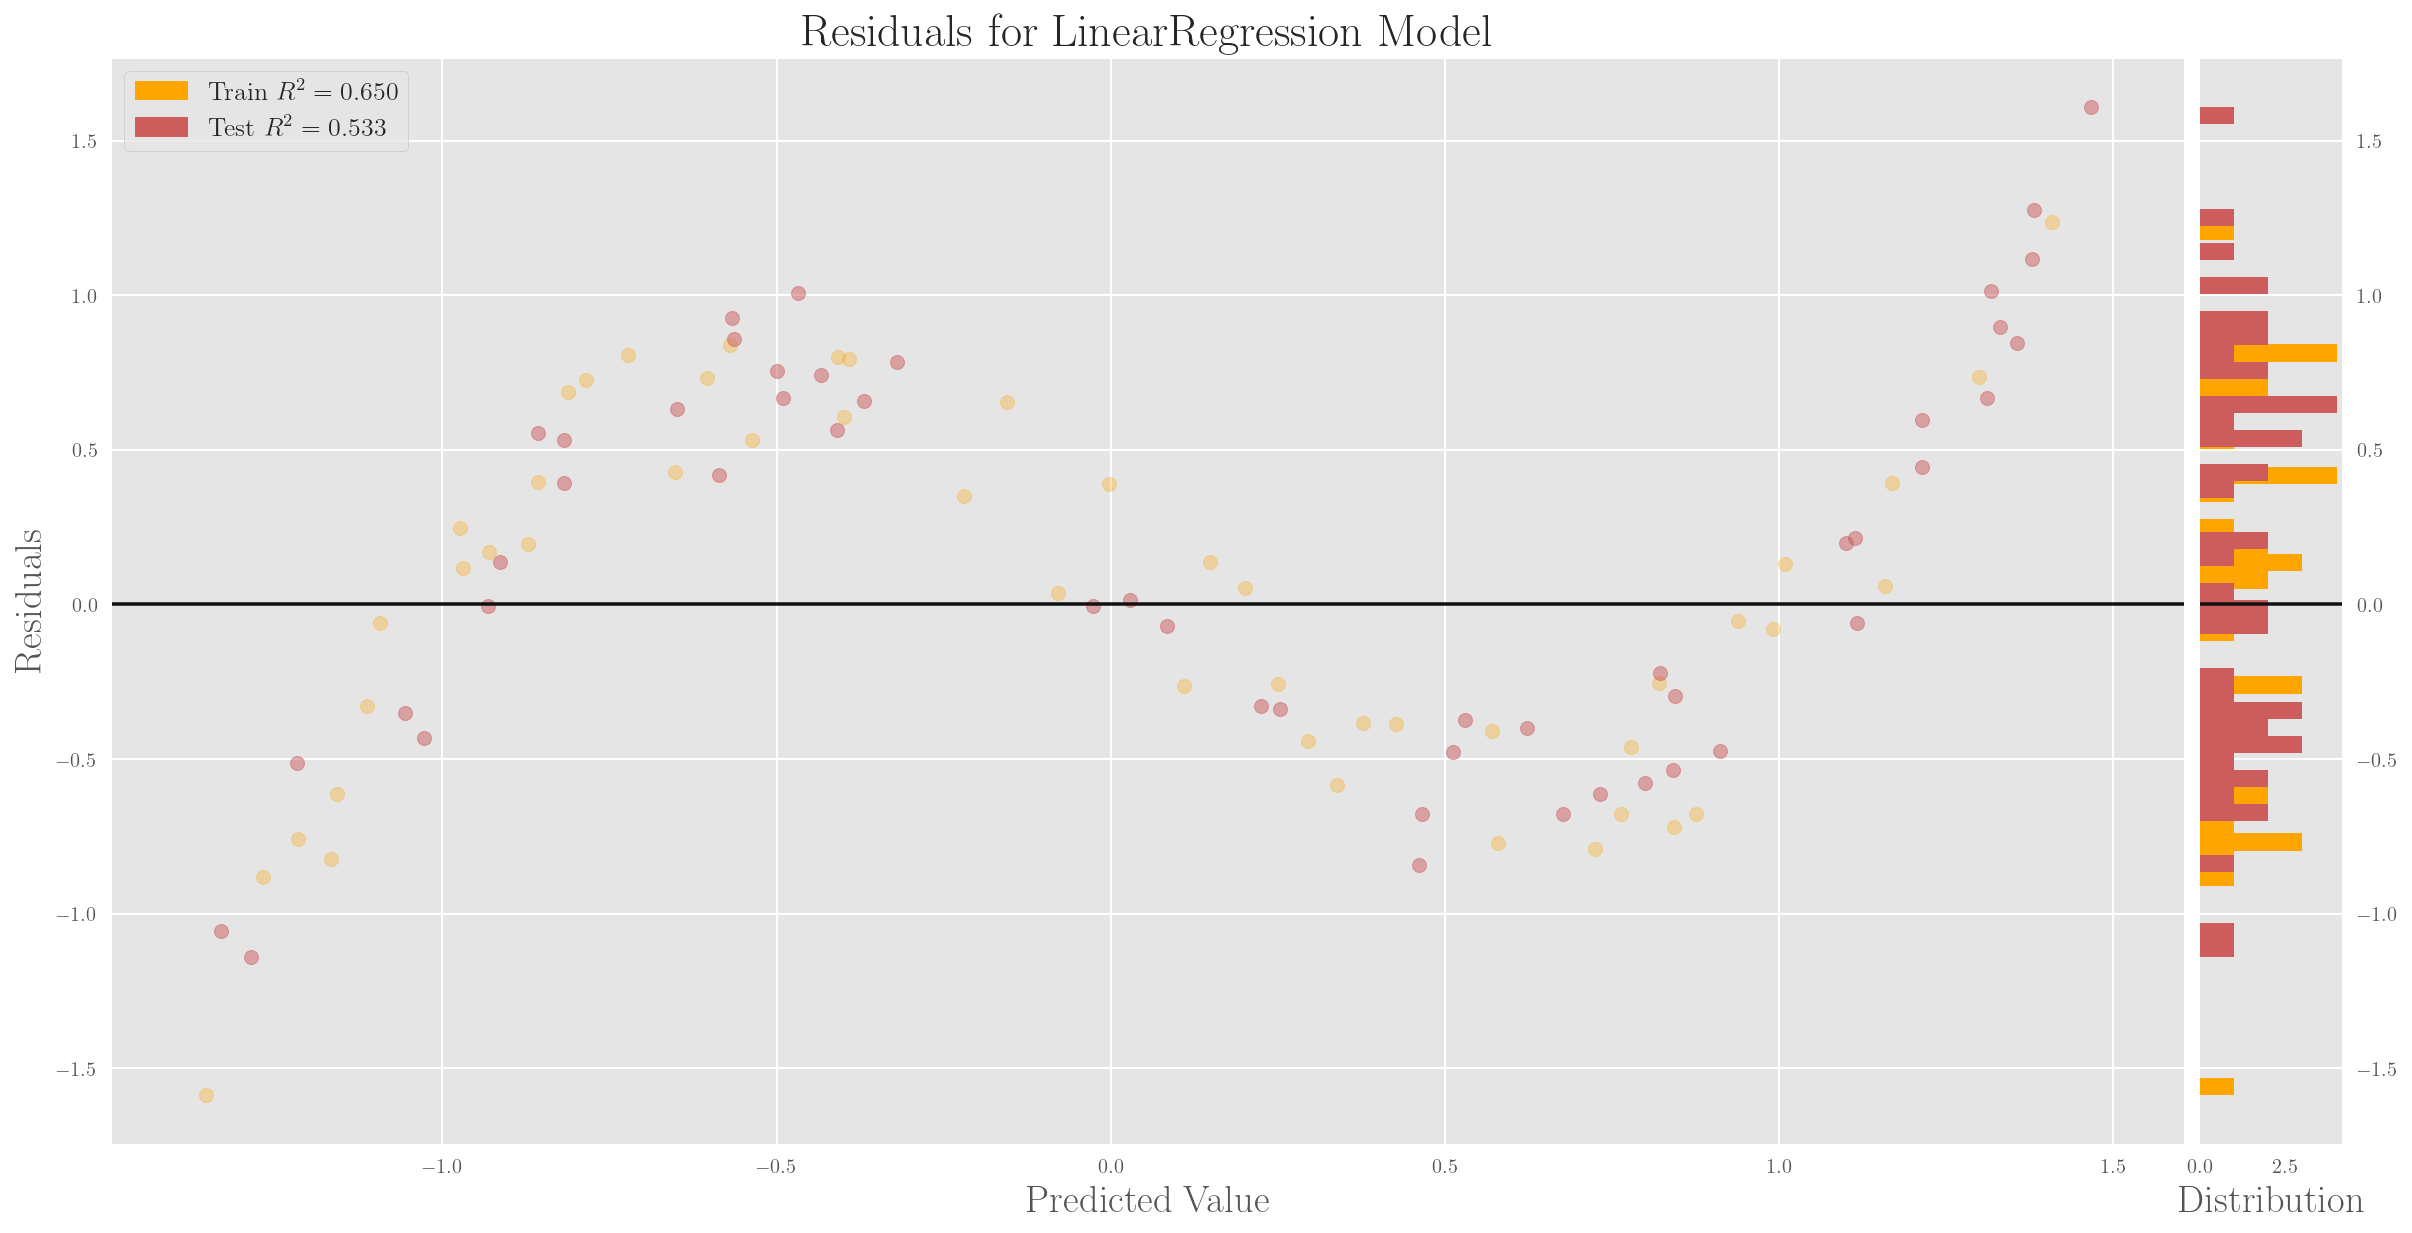

In [38]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_train, y_train, X_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

The residuals display a striking pattern! The presence of a pattern in the residuals in a clear indication that the model has failed to capture some essential characteristics of the relationship between $x$ and $y$.

## Visualization of the model predictions

As a final step, visualize the predictions of the model, and superimpose it on the actual data. This should give us a sense of how well the model is working.

In [39]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 1000)}) 
yhat = model.predict(X)

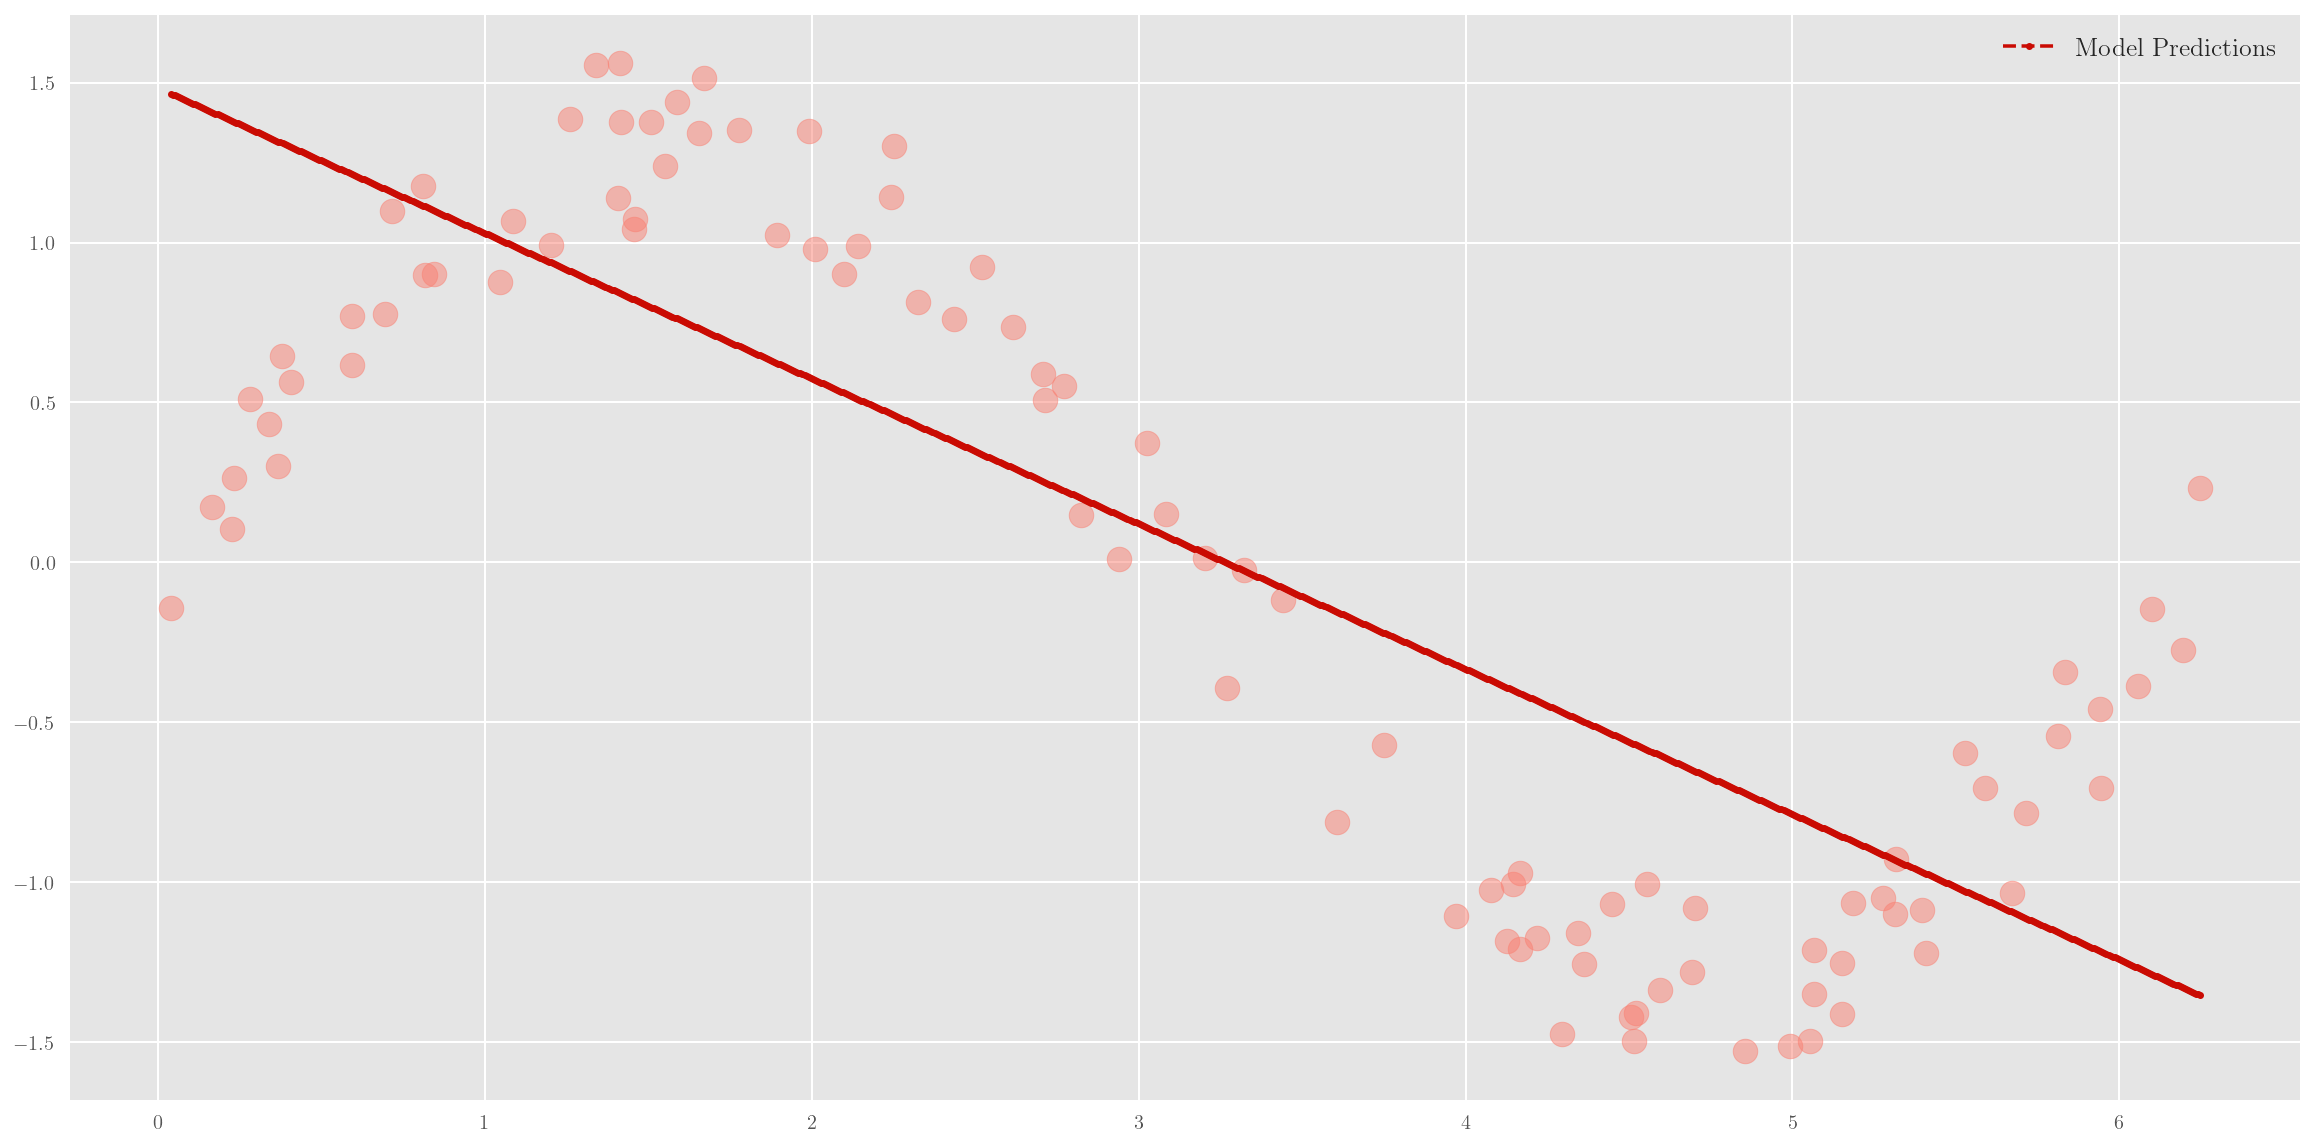

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

This is certainly the best straight line one could fit to the data; so clearly the regression model as learned to fit the data as closely as possible, given the underlying assumption of linearly.

Nevertheless, the model is patently unsatisfactory.

# Polynomial Regression

let's revisit the plot of the data, and observe that there are two bends in it. Therefore, can we fit a polynomial of degree **three** to it? Let us explore.

In the interest of brevity, we have merged the steps of:
* create polynomial degrees of the input
* fit a linear model to the data
* make predictions on test data
* print model diagnostics

In [41]:
degree     = 3
polynomial = PolynomialFeatures(degree)
X_poly = polynomial.fit_transform(X_train)
model = LinearRegression()
# Now, train the model
model.fit(X_poly, y_train)
print ("The cofficients: {}".format(model.coef_))
X_poly_test = polynomial.fit_transform(X_test)
yhat = model.predict(X_poly_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

The cofficients: [ 0.          2.66573533 -1.21794773  0.12921739]
Mean squared error: 0.03
Coefficient of Determination (R^2):0.9657774690201636


The results are encouraging: we are getting a very good value for the coefficient of determination. Let us proceed now with the residual analysis.

## Residual Analysis

start by plotting the residuals from the predictions. Recall that the residual from the prediction $\hat{y}_i$ on a particular datum $(x_i, y_i)$ is defined as: 

\begin{equation}\mathbf{ r_i = \hat{y}_i  - y_i }\end{equation}

We will use the `yellowbrick` library for looking at the model characteristics.

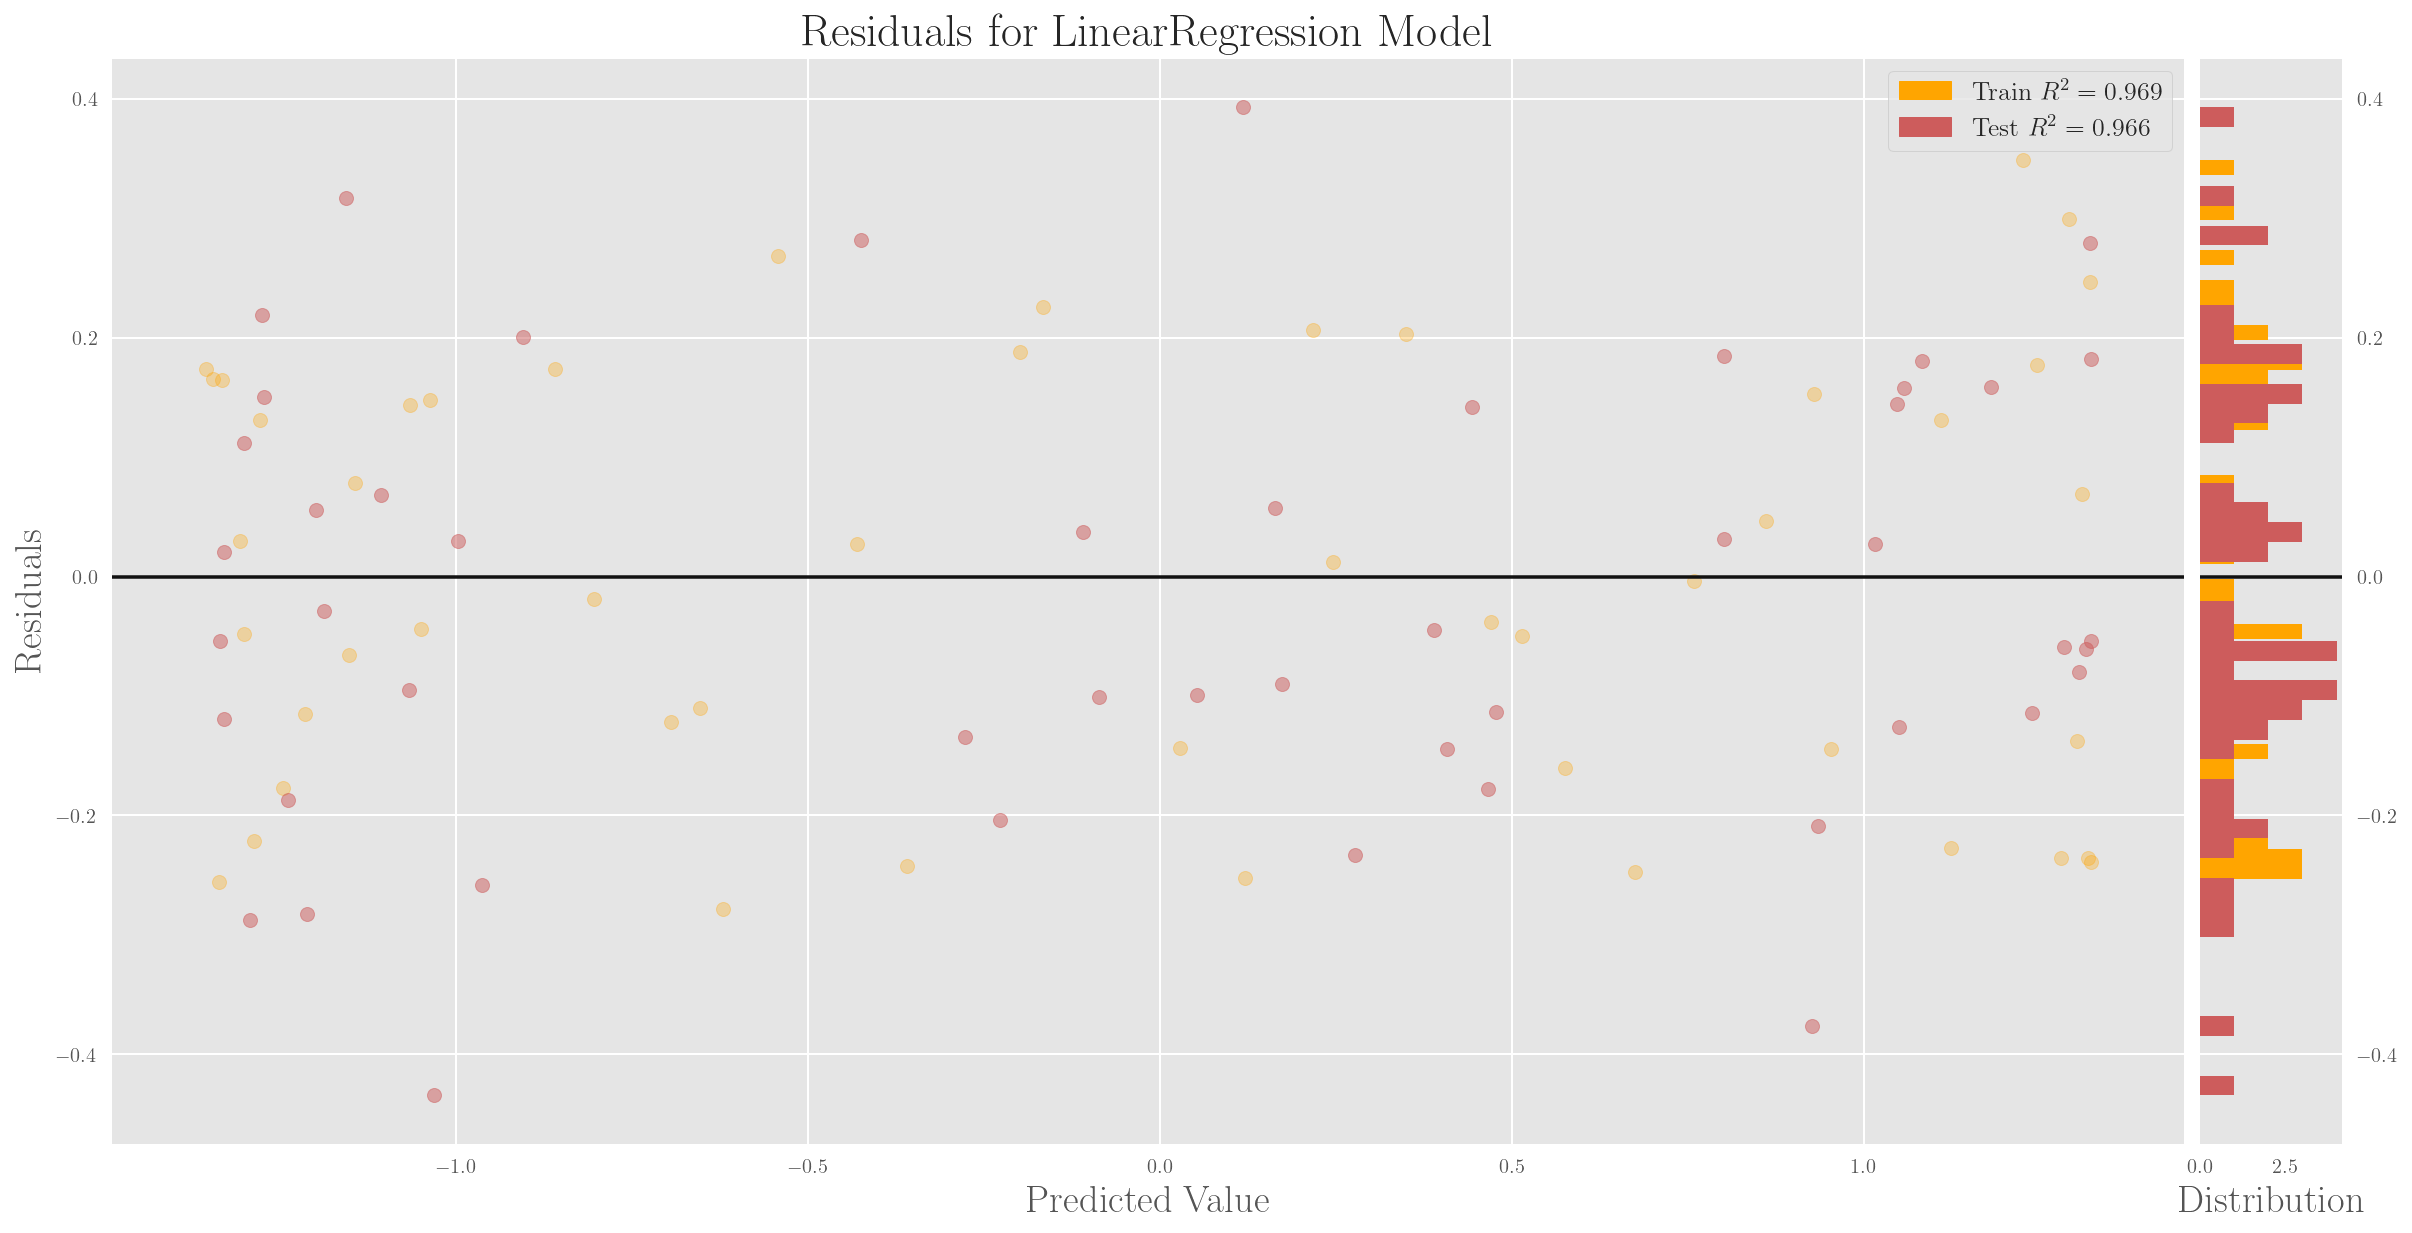

In [42]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_poly, y_train, X_poly_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

This is far better: there are no patterns, and the residuals seem to exhibit homoscedasticity.

## Visualization of the model predictions

As a final step, let us visualize the predictions of the model, and superimpose it on the actual data. This should give us a sense of how well the model is working.

In [43]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 1000)}) 
yhat = model.predict(polynomial.transform(X))

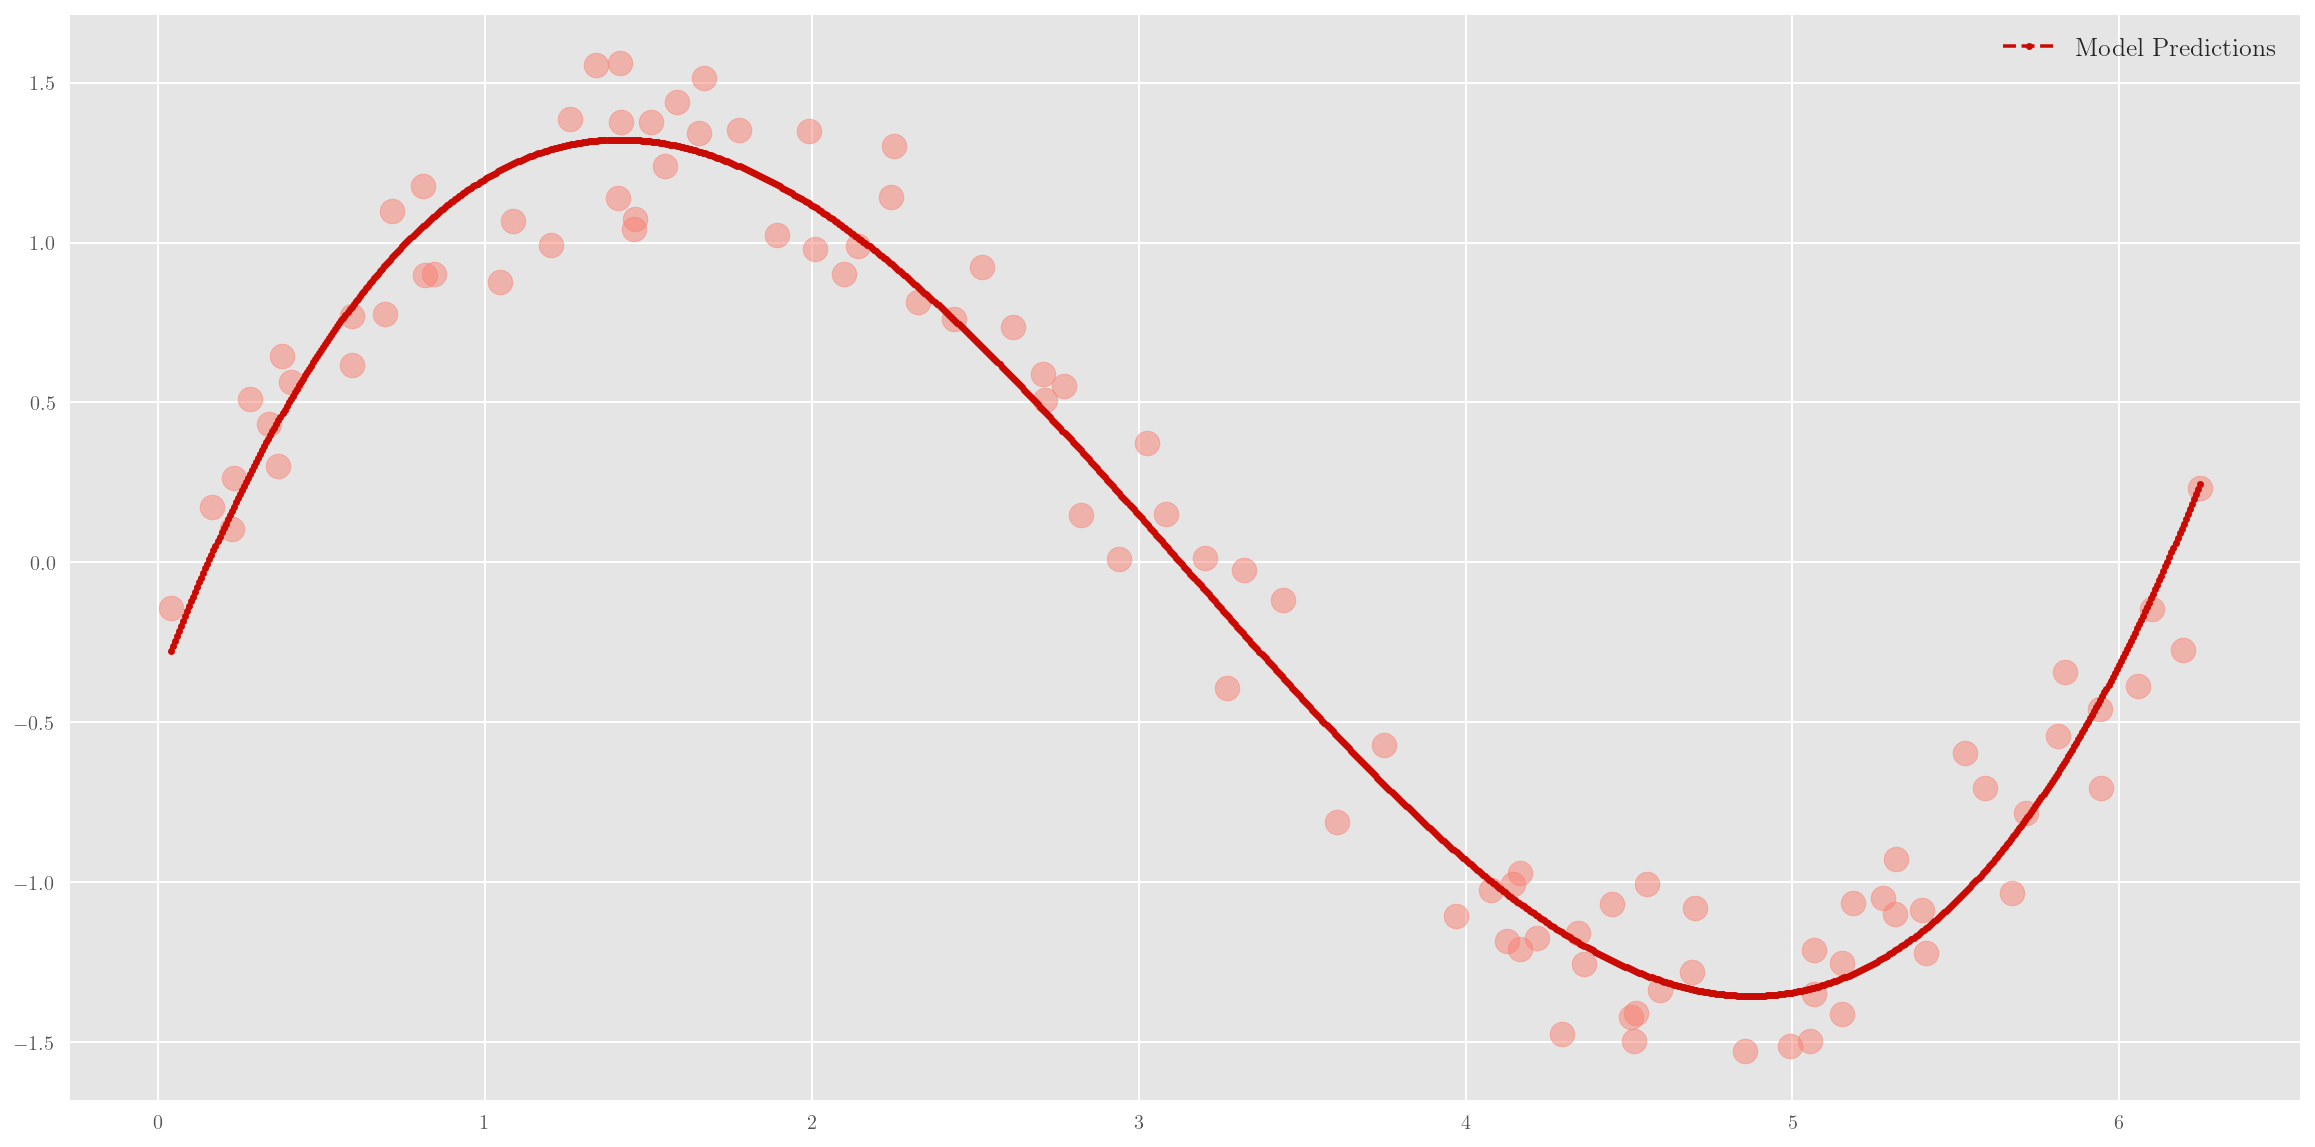

In [44]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

# Conclusion

Looks like a superior model than the one constructed from a naive application of linear regression. The coefficient of determination has vastly improved, the pattern in residuals is gone and residual plot shows homoscedasticity, and finally the prediction plot has a high fidelity with the data.


This illustrated the power of polynomial regression.


Next let's build the most effective models for the datasets:
    
1. `univariate-2.csv`
2. `univariate-3.csv`
3. `dataset-3.csv`
4. `dataset-4.csv`
5. `dataset-5.csv`